### Подключение библиотек и скриптов

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np

### 1. взять любой набор данных для бинарной классификации (можно скачать один из модельных с https://archive.ics.uci.edu/ml/datasets.php)

#### Загрузка данных

In [438]:
data = pd.read_csv("HW6/adult.data",names=["age", "workclass", "fnlwgt", "education", "education-num",
                                           "marital-status", "occupation", "relationship", "race",
                                           "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "Income"])
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Проанализируем количественные переменные

In [439]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#### Проанализируем категориальные переменные

In [440]:
data.describe(include=['O']).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
Income,32561,2,<=50K,24720


#### Проанализируем целевую переменную

In [441]:
data['Income'].value_counts()

 <=50K    24720
 >50K      7841
Name: Income, dtype: int64

### 2. сделать feature engineering

Проанализируем пропуски

In [442]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

Преобразуем значение целевой переменной и др

In [443]:
data['Income'] = data['Income'].apply(lambda x: 1 if x==' >50K' else 0)

In [444]:
data['sex'] = data['sex'].apply(lambda x: 1 if x==' Male' else 0)

Проведем кодировку

In [445]:
data['native-country'] = LabelEncoder().fit_transform(data['native-country'])
data['education'] = LabelEncoder().fit_transform(data.education)
data['marital-status'] = LabelEncoder().fit_transform(data['marital-status'])
data['occupation'] = LabelEncoder().fit_transform(data['occupation'])
data['relationship'] = LabelEncoder().fit_transform(data['relationship'])
data['race'] = LabelEncoder().fit_transform(data['race'])
data['workclass'] = LabelEncoder().fit_transform(data['workclass'])

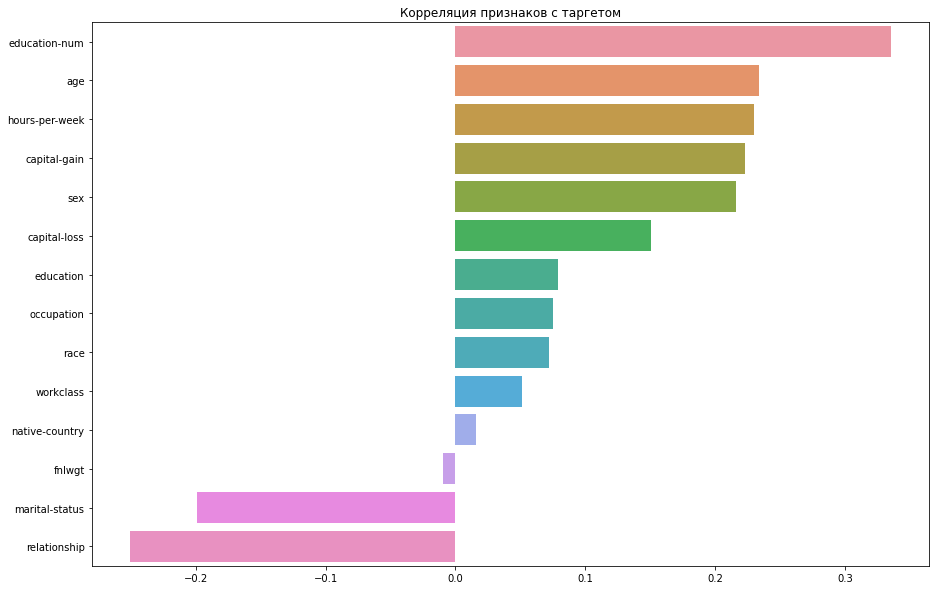

In [446]:
target_name = "Income"
corr_with_target = data.corr()["Income"].sort_values(ascending=False)[1:]
plt.figure(figsize=(15, 10))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Корреляция признаков с таргетом')
plt.show()

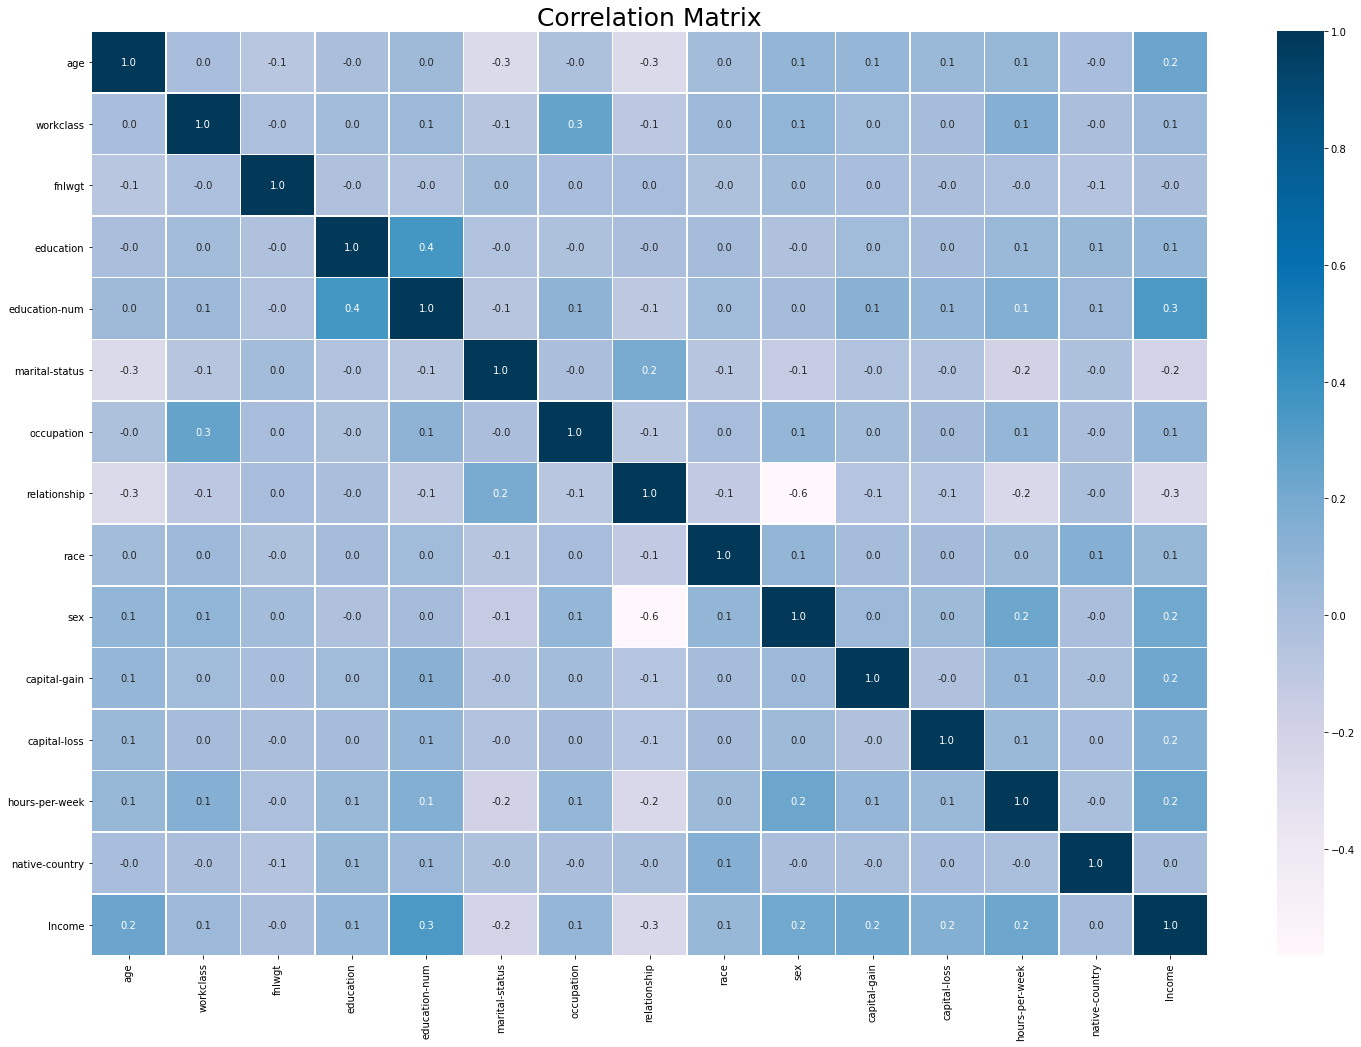

In [447]:
# Correlation Matrix
f, ax = plt.subplots(figsize = [25, 17])
sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'PuBu' )
ax.set_title('Correlation Matrix', fontsize=25)
plt.show()

### 3. обучить любой классификатор (какой вам нравится)

In [448]:
# categoricals = ['native-country', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'workclass']
# data[categoricals] = data[categoricals].astype('category')

In [449]:
x_data = data.iloc[:,:-1]
y_data = data.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [450]:
model = xgb.XGBClassifier(enable_categorical=True,)

model.fit(x_train, y_train)
y_predict = model.predict(x_test)

/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:04] WARNING: ../src/learner.cc:573: 
Parameters: { "enable_categorical" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[22:32:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [451]:
results = {
    'name': [],
    'f1': [],
    'roc': [],
    'recall': [],
    'precision': [],
}

Проверяем качество

In [452]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score, accuracy_score, f1_score

def evaluate_results(y_test, y_predict, name_model):
    print('Classification results:')
    f1 = f1_score(y_test, y_predict)
    print("f1: %.2f%%" % (f1 * 100.0)) 
    roc = roc_auc_score(y_test, y_predict)
    print("roc: %.2f%%" % (roc * 100.0)) 
    rec = recall_score(y_test, y_predict, average='binary')
    print("recall: %.2f%%" % (rec * 100.0)) 
    prc = precision_score(y_test, y_predict, average='binary')
    print("precision: %.2f%%" % (prc * 100.0))
    
    results['name'].append(name_model)
    results['f1'].append(f1)
    results['roc'].append(roc)
    results['recall'].append(rec)
    results['precision'].append(prc)

    
evaluate_results(y_test, y_predict, 'XGBClassifier')

Classification results:
f1: 71.18%
roc: 79.70%
recall: 64.92%
precision: 78.79%


### 4. далее разделить ваш набор данных на два множества: P (positives) и U (unlabeled). Причем брать нужно не все положительные (класс 1) примеры, а только лишь часть

Представим, что нам неизвестны негативы и часть позитивов

In [453]:
mod_data = data.copy()
#get the indices of the positives samples
pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
#shuffle them
np.random.shuffle(pos_ind)
# leave just 25% of the positives marked
pos_sample_len = int(np.ceil(0.25 * len(pos_ind)))
print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
pos_sample = pos_ind[:pos_sample_len]

Using 1961/7841 as positives and unlabeling the rest


Создаем столбец для новой целевой переменной, где у нас два класса - P (1) и U (-1)

In [454]:
mod_data['class_test'] = -1
mod_data.loc[pos_sample,'class_test'] = 1
print('target variable:\n', mod_data.iloc[:,-1].value_counts())

target variable:
 -1    30600
 1     1961
Name: class_test, dtype: int64


Теперь у нас только 1961 положительный образец 1, остальные не определены -1.

In [455]:
mod_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income,class_test
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0,-1
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0,-1
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0,-1
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0,-1
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0,-1
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0,-1
6,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0,-1
7,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1,-1
8,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1,-1
9,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1,-1


In [456]:
x_data = mod_data.iloc[:,:-2].values # just the X 
y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
y_positive = mod_data.iloc[:,-2].values # original class

### 5. применить random negative sampling для построения классификатора в новых условиях

In [457]:
mod_data = mod_data.sample(frac=1)
neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
pos_sample = mod_data[mod_data['class_test']==1]
print(neg_sample.shape, pos_sample.shape)
sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

(1961, 16) (1961, 16)


In [458]:
model = xgb.XGBClassifier()

model.fit(sample_train.iloc[:,:-2].values, 
          sample_train.iloc[:,-2].values)
y_predict = model.predict(sample_test.iloc[:,:-2].values)
evaluate_results(sample_test.iloc[:,-2].values, y_predict, 'PU_25')

[22:32:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification results:
f1: 61.01%
roc: 81.97%
recall: 87.55%
precision: 46.82%


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


### 6. сравнить качество с решением из пункта 4 (построить отчет - таблицу метрик)

In [459]:
df_res_models = pd.DataFrame(data=results)
df_res_models

,name,f1,roc,recall,precision
0,XGBClassifier,0.711829,0.797014,0.649168,0.787879
1,PU_25,0.610146,0.819718,0.875523,0.468224


Не смотря на более высокий результат recall, я бы не рассматривал результат PU как превосходящий XGBClassifier, т.к. precision - точность низкая 0,46

### 7. поэкспериментировать с долей P на шаге 5 (как будет меняться качество модели при уменьшении/увеличении размера P)

In [460]:
def call_p(p_val, name_model):
    mod_data = data.copy()
    #get the indices of the positives samples
    pos_ind = np.where(mod_data.iloc[:,-1].values == 1)[0]
    #shuffle them
    np.random.shuffle(pos_ind)
    # leave just 25% of the positives marked
    pos_sample_len = int(np.ceil(p_val * len(pos_ind)))
    print(f'Using {pos_sample_len}/{len(pos_ind)} as positives and unlabeling the rest')
    pos_sample = pos_ind[:pos_sample_len]

    mod_data['class_test'] = -1
    mod_data.loc[pos_sample,'class_test'] = 1
    print('target variable:\n', mod_data.iloc[:,-1].value_counts())

    x_data = mod_data.iloc[:,:-2].values # just the X 
    y_labeled = mod_data.iloc[:,-1].values # new class (just the P & U)
    y_positive = mod_data.iloc[:,-2].values # original class

    mod_data = mod_data.sample(frac=1)
    neg_sample = mod_data[mod_data['class_test']==-1][:len(mod_data[mod_data['class_test']==1])]
    sample_test = mod_data[mod_data['class_test']==-1][len(mod_data[mod_data['class_test']==1]):]
    pos_sample = mod_data[mod_data['class_test']==1]
    print(neg_sample.shape, pos_sample.shape)
    sample_train = pd.concat([neg_sample, pos_sample]).sample(frac=1)

    model = xgb.XGBClassifier()

    model.fit(sample_train.iloc[:,:-2].values, 
              sample_train.iloc[:,-2].values)
    y_predict = model.predict(sample_test.iloc[:,:-2].values)
    evaluate_results(sample_test.iloc[:,-2].values, y_predict, name_model)
    


In [461]:
call_p(0.05, 'PU_0.05')
call_p(0.1, 'PU_0.1')
call_p(0.15, 'PU_0.15')
call_p(0.35, 'PU_0.35')

Using 393/7841 as positives and unlabeling the rest
target variable:
 -1    32168
 1      393
Name: class_test, dtype: int64
(393, 16) (393, 16)
[22:32:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification results:
f1: 61.62%
roc: 79.40%
recall: 88.50%
precision: 47.26%
Using 785/7841 as positives and unlabeling the rest
target variable:
 -1    31776
 1      785
Name: class_test, dtype: int64
(785, 16) (785, 16)
[22:32:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification results:
f1: 61.54%
roc: 80.10%
recall: 88.48%
precision: 47.18%
Using 1177/7841 as positives and unlabeling the rest
target variable:
 -1    31384
 1     1177
Name: class_test, dtype: int64
(1177, 16) (1177, 16)
[22:32:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification results:
f1: 61.50%
roc: 80.91%
recall: 88.84%
precision: 47.02%
Using 2745/7841 as positives and unlabeling the rest
target variable:
 -1    29816
 1     2745
Name: class_test, dtype: int64
(2745, 16) (2745, 16)
[22:32:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Classification results:
f1: 58.23%
roc: 82.57%
recall: 89.18%
precision: 43.23%


In [462]:
df_res_models = pd.DataFrame(data=results)
df_res_models

,name,f1,roc,recall,precision
0,XGBClassifier,0.711829,0.797014,0.649168,0.787879
1,PU_25,0.610146,0.819718,0.875523,0.468224
2,PU_0.05,0.616187,0.793996,0.884987,0.472632
3,PU_0.1,0.615392,0.800986,0.884772,0.471760
4,PU_0.15,0.614970,0.809052,0.888370,0.470249
5,PU_0.35,0.582330,0.825661,0.891804,0.432310


Уменьшение P, в частности до 0.05, положительно сказалось на precision, но по прежнему точность намного ниже XGBClassifier.